In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [4]:
#sns.boxplot(csv1['execution_time'])
#Removing outliers for dataset of 500 with same settings as below gave better results but graph was not good enough; mse =4504.101113148902 rmsle = 0.10840977539189336

In [5]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [6]:
data1 = data.drop(csv1.index[400000:]) #datasize = 500,size = 9, ngram =(4,4) random_state = 42, rmse = 4902308.235271806 rmsle = 0.9812317013663807
# increase of sample size to 100,000 increased r2 of test data to 0.52896, test_size= 0.2, rmse_train = 0.00013077200709273113, rmse_test = 0.30816619086927893 ,rmsle = 0.0742664390437385, size=9, CountVectorizer(ngram_range = (4,4), random_state=42   
#data.head()

In [7]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
399995,@HWI-D00360:5:H814YADXX:1:1102:20625:49585 1:N...,TAATTCACACATCACAAAGAAGTTTCTCAGTAAGCTTCTGTCTAGT...,CCCDFFFFGBHHFGIIGIIEGIIIIIFIIIHHIGDHIIIIGHIIIG...,5373.125
399996,@HWI-D00360:5:H814YADXX:1:1102:20567:49647 1:N...,AACAGTTACAGTTGTTGAAATCCACCCTGTCTCTGATTCATTGAAT...,CCCFFFFFHHHHHJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,320.417
399997,@HWI-D00360:5:H814YADXX:1:1102:20685:49669 1:N...,TTGTAAGGTGGCTGCTTCTTCAGCATCAGTAGGAGAATGTCTCTAA...,@@@;BDDDCDFHHIGEGGHI@CHHIBEGGHIIG@EGEEGCFHIIIG...,365.791
399998,@HWI-D00360:5:H814YADXX:1:1102:20965:49510 1:N...,ATGCTGTATGAAAAGAAAGGTTAAACTCTGTGAGTTAAACACACAC...,@@CFDFEFDHGHHJIIGGEGEHIIIICHGIGDFGCBDGHGGCDHGG...,1504.875
399999,@HWI-D00360:5:H814YADXX:1:1102:20855:49538 1:N...,AAACATGAAAATAGAGAGACTGGTTGAAGTAAAGCCTTCCTTAGTT...,@@@DDDDDFFHFFHHIFHGCCGHB?GEGI<FGHIAFHIIIIIGGDA...,777.666


In [8]:
data1.describe()

,execution_time
count,400000.000000
mean,2005.986166
std,3996.335883
min,176.958000
25%,560.708000
50%,676.208500
75%,1405.291250
max,124555.542000


In [9]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
399995,TAATTCACACATCACAAAGAAGTTTCTCAGTAAGCTTCTGTCTAGT...,5373.125
399996,AACAGTTACAGTTGTTGAAATCCACCCTGTCTCTGATTCATTGAAT...,320.417
399997,TTGTAAGGTGGCTGCTTCTTCAGCATCAGTAGGAGAATGTCTCTAA...,365.791
399998,ATGCTGTATGAAAAGAAAGGTTAAACTCTGTGAGTTAAACACACAC...,1504.875


In [10]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
399995,TAATTCACACATCACAAAGAAGTTTCTCAGTAAGCTTCTGTCTAGT...,3.730227
399996,AACAGTTACAGTTGTTGAAATCCACCCTGTCTCTGATTCATTGAAT...,2.505716
399997,TTGTAAGGTGGCTGCTTCTTCAGCATCAGTAGGAGAATGTCTCTAA...,2.563233
399998,ATGCTGTATGAAAAGAAAGGTTAAACTCTGTGAGTTAAACACACAC...,3.177500


In [11]:
#sns.boxplot(reads['execution_time'])

In [12]:
#new = reads.drop(reads[reads['execution_time'] >= 2500].index, inplace = True)
#new = reads[reads.execution_time <= 2000]
#new

In [13]:
#sns.boxplot(new['execution_time'])

In [14]:
#new1 = new[new.execution_time >= 450]
#new1

In [15]:
#sns.boxplot(new1['execution_time'])

In [16]:
def Kmers_funct(seq, size=9): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].upper() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [17]:
reads

,execution_time,words
0,3.360806,"[CTGGTCCTA, TGGTCCTAA, GGTCCTAAC, GTCCTAACA, T..."
1,2.828660,"[TGGCTATGG, GGCTATGGG, GCTATGGGC, CTATGGGCT, T..."
2,2.879216,"[ACTTTCTAT, CTTTCTATC, TTTCTATCT, TTCTATCTC, T..."
3,2.598836,"[ATCAAAAAC, TCAAAAACA, CAAAAACAT, AAAAACATT, A..."
4,2.829304,"[CAGGTTCCA, AGGTTCCAA, GGTTCCAAT, GTTCCAATA, T..."
...,...,...
399995,3.730227,"[TAATTCACA, AATTCACAC, ATTCACACA, TTCACACAT, T..."
399996,2.505716,"[AACAGTTAC, ACAGTTACA, CAGTTACAG, AGTTACAGT, G..."
399997,2.563233,"[TTGTAAGGT, TGTAAGGTG, GTAAGGTGG, TAAGGTGGC, A..."
399998,3.177500,"[ATGCTGTAT, TGCTGTATG, GCTGTATGA, CTGTATGAA, T..."


In [18]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = reads.iloc[:, 0].values # y_human for human_dna

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4)
X = cv.fit_transform(human_texts)
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfid = TfidfVectorizer(ngram_range = (4,4))
#X = tfid.fit_transform(human_texts)
#print(X)
#print(X[1])
#X = (X-np.mean(X))/np.std(X)

In [20]:
#from sklearn.preprocessing import MaxAbsScaler
#abs_scal = MaxAbsScaler()

#XX = abs_scal.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y_human,
                                                   test_size = 0.20,
                                                   random_state=42)# changed random state from 42 to 0
                                                   

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
#model.fit(X, y_human)
model.fit(X_train, y_train)

LinearRegression()

In [24]:
r_sq = model.score(X_train,y_train)

In [25]:
r_sq

0.9999977225114963

In [26]:
r_sq_test = model.score(X_test,y_test)
r_sq_test

0.4891963404679346

In [27]:
# rmse_train =
# rmse_test  =

In [28]:
y_pred = model.predict(X_test)

In [29]:
#y_pred

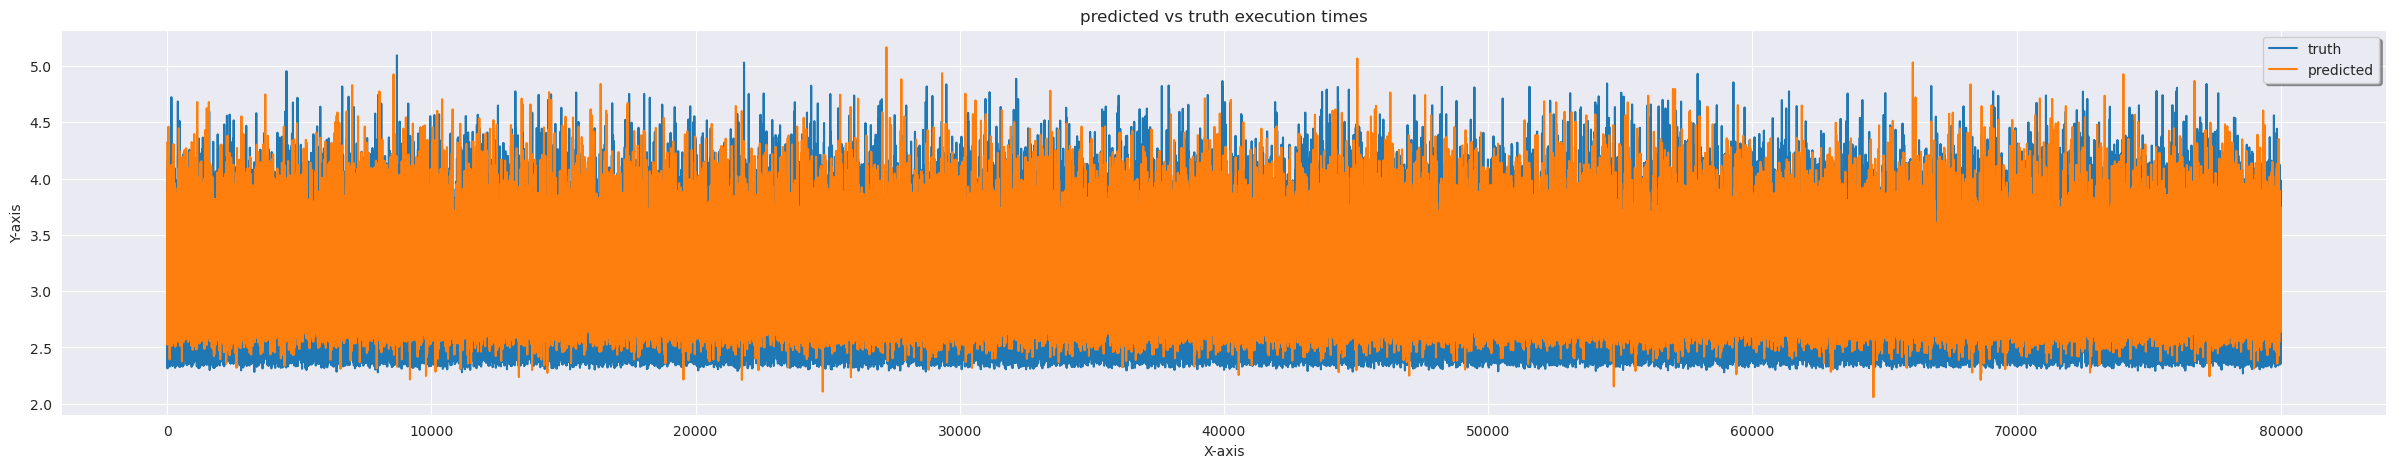

In [30]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [31]:
y_pred_non_log = 10**(y_pred)
y_test_non_log = 10**(y_test)

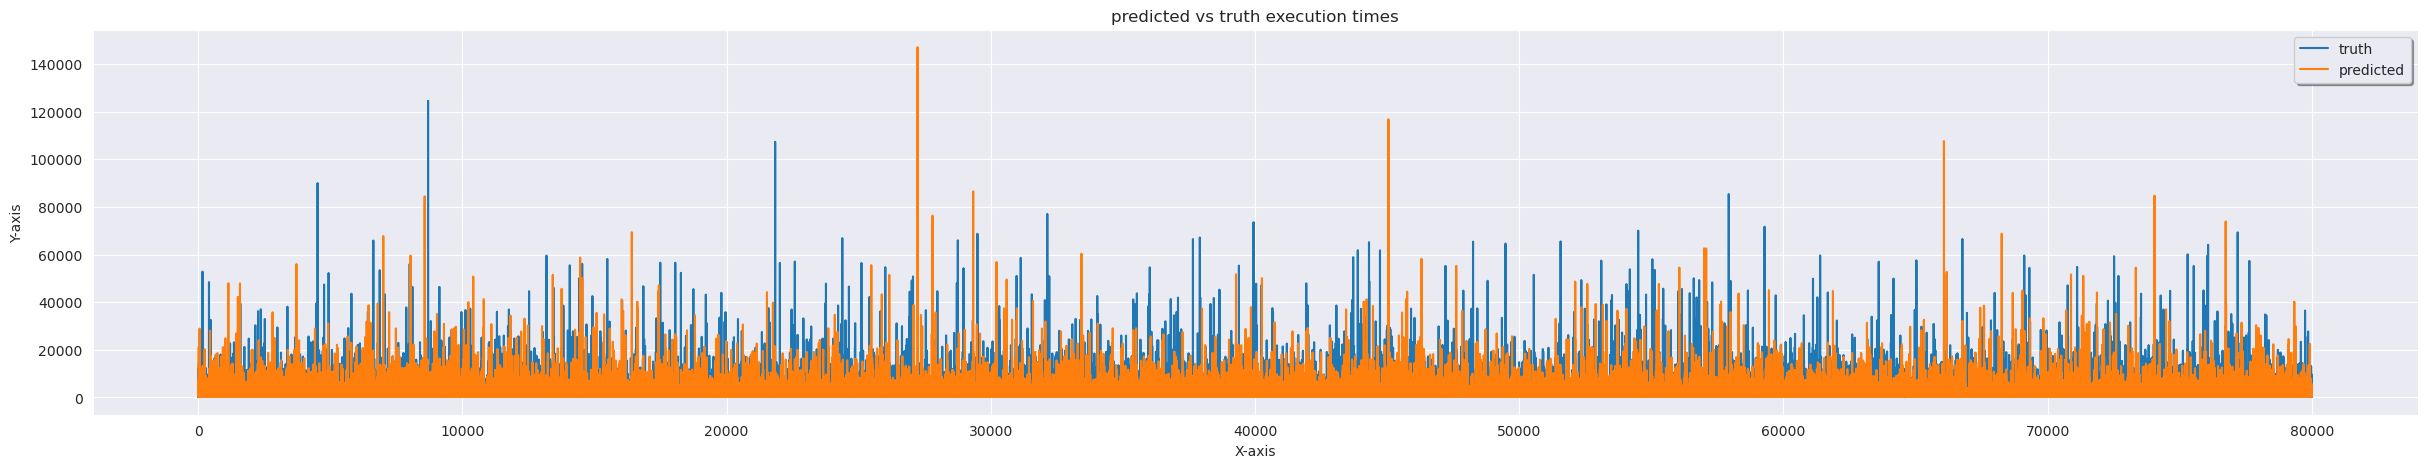

In [32]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
ypred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))             ##8.775726751036775e-05 for 200 samples  and max abs scaler
rmse_train

0.0006799510674290043

In [34]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))              ##1705.8371787033657 for 200 samples  and max abs scaler
rmse_test

0.32182820295143666

In [35]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,y_pred)**0.5         ##1.2021350799389177 for 200 samples  and max abs scaler
rmsle

0.07767043911269214

In [36]:
rmsle_non_log = mean_squared_log_error(y_test_non_log,y_pred_non_log)**0.5        
rmsle_non_log

0.7402788995179717

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [38]:
cv = KFold(n_splits = 5, random_state= 42, shuffle=True)

In [39]:
# model_cv = LinearRegression()
# model_cv

In [40]:
scores = cross_val_score(model, X, y_human, scoring='r2', cv=cv, n_jobs=-1)

In [41]:
print(scores)

[0.48920928 0.48399944 0.49269947 0.48863146 0.48594578]


In [42]:
rmse_cv = np.sqrt(np.mean(np.absolute(scores)))
rmse_cv

0.6986394524553388

In [43]:
scores_non_log = 10**(scores)
rmse_cv_non_log = np.sqrt(np.mean(np.absolute(scores_non_log)))
rmse_cv_non_log

1.7540970731694123

In [44]:
predictions = cross_val_predict (model, X, y_human, cv = cv)

In [45]:
#predictions

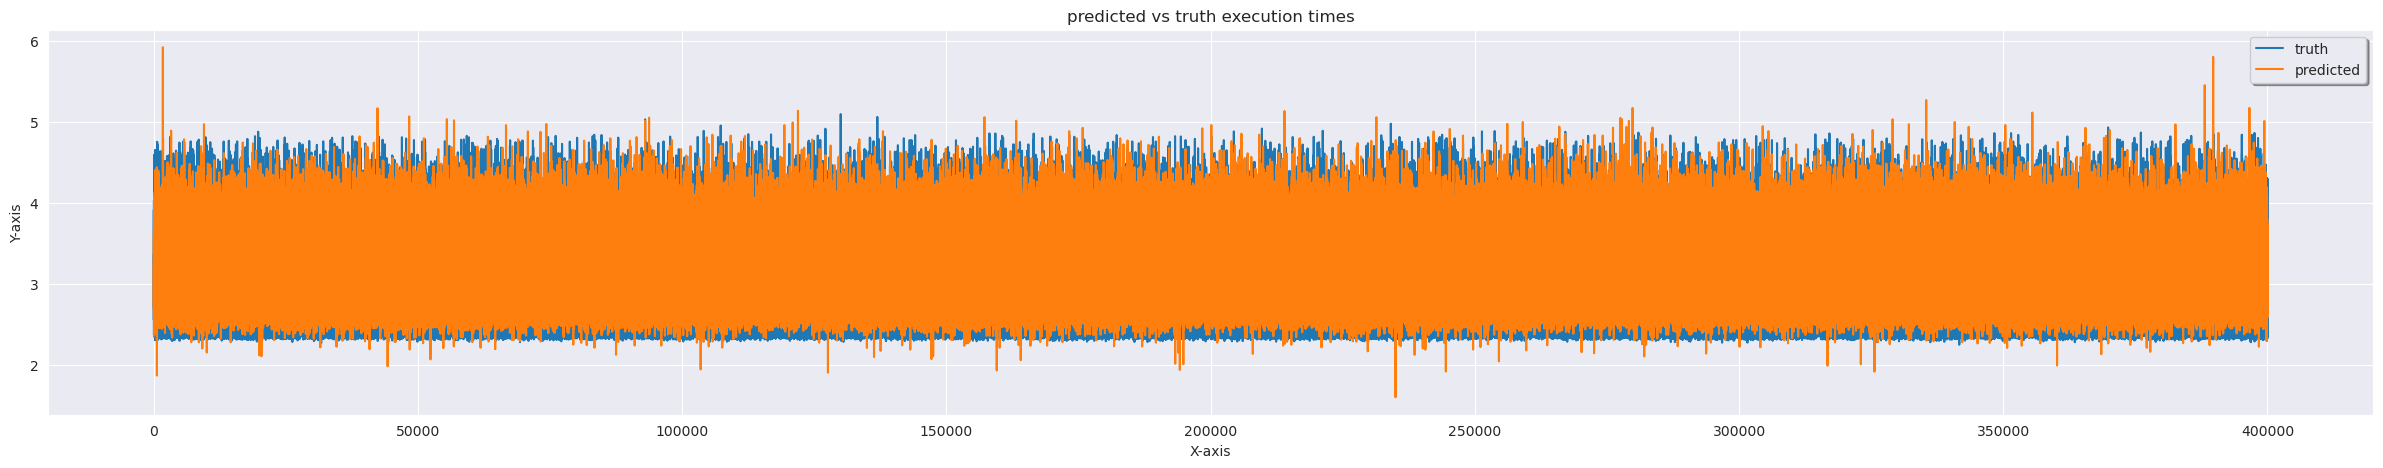

In [46]:
x_ax = range(len(y_human))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_human, label="truth")
plt.plot(x_ax, predictions, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [47]:
rmsle_cv = mean_squared_log_error(y_human,predictions)**0.5        
rmsle_cv

0.07781293633566708

In [48]:
predictions_non_log = 10**(predictions)
y_human_non_log = 10**(y_human)

In [49]:
rmsle_non_log = mean_squared_log_error(y_human_non_log,predictions_non_log)**0.5        
rmsle_non_log

0.7414168134655533